In [2]:
import sys
sys.path.append("..")
import numpy as np
from scipy.stats import multivariate_normal
from utils import logf, logp, normalize, logf_Jacobian
from Manifolds.RotatedEllipse import RotatedEllipse
from zappa import zappa_sampling, project
import matplotlib.pyplot as plt
from math import degrees, radians
from numpy.linalg import svd
from math import sqrt, log, exp

### Target Distribution

In [3]:
# Parameters
mu = np.zeros(2)                                  # Center of the MVN
Sigma = np.array([[1.0, 0.99], [0.99, 2.0]])        # Covariance matrix of MVN
target = multivariate_normal(mean=mu, cov=Sigma)  # 2D distribution whose contours will be our manifolds

# Maximum level set value
z_max = target.pdf(mu)

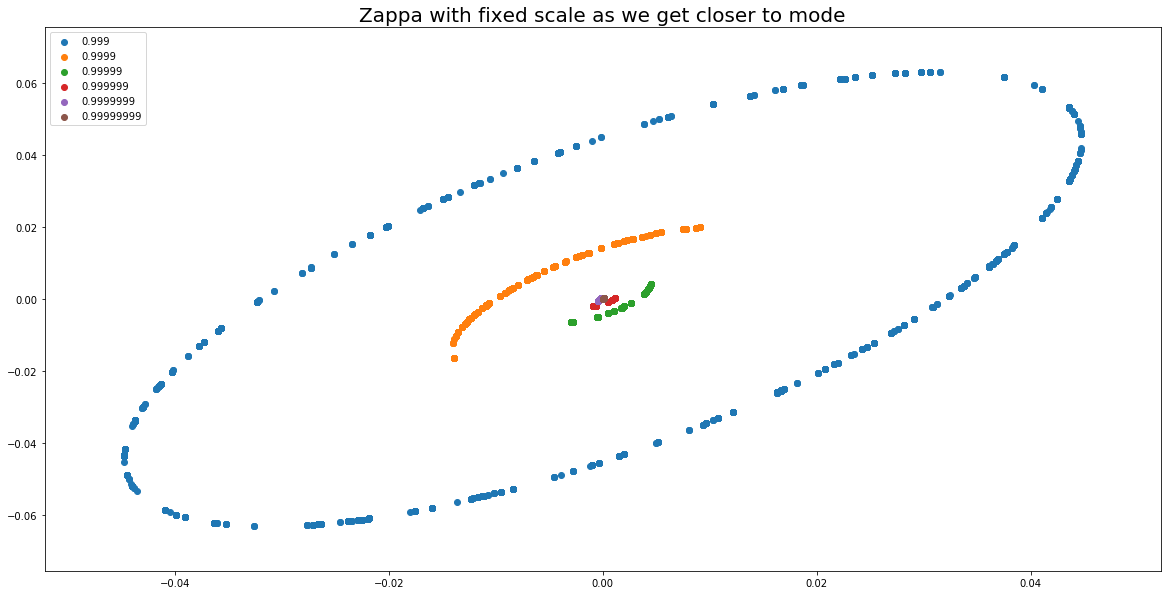

In [4]:
perc = 1 - np.array([1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8])
fig, ax = plt.subplots(figsize=(20, 10))
for i, p in enumerate(perc):
    # Instantiate manifold
    manifold = RotatedEllipse(mu, Sigma, p*z_max)
    # Grab random point on contour
    x0 = manifold.to_cartesian(np.random.uniform(0.0, 2*np.pi))
    # Sample with fixed scale 0.5
    samples = zappa_sampling(x0, manifold, logf, logp, n=2000, sigma=0.5, tol=1.48e-08, a_guess=1.0)
    # Plot
    ax.scatter(*samples.T, label="{}".format(p))

plt.legend()
plt.title("Zappa with fixed scale as we get closer to mode", fontsize=20)
plt.show()

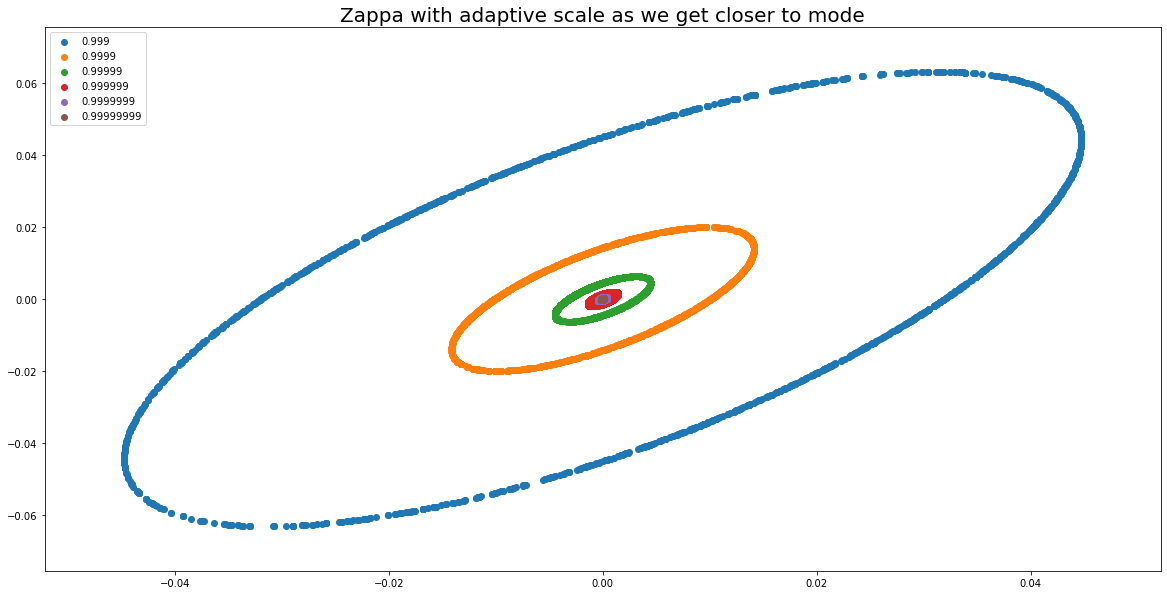

In [5]:
# For 0.9*z_max, the scaling works fine therefore simply use proportions
z_ok = 0.9*z_max
peri_ok = RotatedEllipse(mu, Sigma, z_ok).peri()

perc = 1 - np.array([1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8])
fig, ax = plt.subplots(figsize=(20, 10))
for i, p in enumerate(perc):
    # Create ellipse
    manifold = RotatedEllipse(mu, Sigma, p*z_max)
    # Compute scaling
    scale = 0.5 * manifold.peri() / peri_ok
    # Grab random starting point on contour
    x0 = manifold.to_cartesian(np.random.uniform(0.0, 2*np.pi))
    # Sample
    samples = zappa_sampling(x0, manifold, logf, logp, n=2000, sigma=scale, tol=1.48e-08, a_guess=1.0)
    # Plot
    ax.scatter(*samples.T, label="{}".format(p))

plt.legend()
plt.title("Zappa with adaptive scale as we get closer to mode", fontsize=20)
plt.show()